In [12]:
!pip install gym matplotlib stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [13]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [14]:
pwd

'/content/drive/MyDrive'

In [21]:
%%writefile chase_evade_simple_env.py

import gym
from gym import spaces
import numpy as np

class ChaseEvadeSimpleEnv(gym.Env):
    """
    A lightweight Gym-compatible environment for 2D chase-and-evade.
    One agent (chaser) is trained using RL. The evader uses a simple heuristic.
    """
    metadata = {'render.modes': ['human']}

    def __init__(self):
        super(ChaseEvadeSimpleEnv, self).__init__()
        self.grid_size = 10.0
        self.catch_distance = 1.0
        self.max_steps = 3000
        self.step_size = 0.3
        self.step_count = 0

        self.observation_space = spaces.Box(
            low=0.0, high=self.grid_size, shape=(4,), dtype=np.float32
        )

        self.action_space = spaces.Box(
            low=-1.0, high=1.0, shape=(2,), dtype=np.float32
        )

        self.chaser_pos = np.zeros(2)
        self.evader_pos = np.zeros(2)

    def reset(self):
        self.chaser_pos = np.random.uniform(0, self.grid_size, size=2)
        self.evader_pos = np.random.uniform(0, self.grid_size, size=2)
        self.step_count = 0
        return self._get_obs()

    def _get_obs(self):
        return np.concatenate([self.chaser_pos, self.evader_pos]).astype(np.float32)

    def step(self, action):
        self.step_count += 1

        action = np.clip(action, -1.0, 1.0)
        self.chaser_pos = np.clip(self.chaser_pos + action * self.step_size, 0, self.grid_size)

        # Evader moves away from chaser
        direction = self.evader_pos - self.chaser_pos
        norm = np.linalg.norm(direction)
        if norm > 0:
            evader_move = (direction / norm) * self.step_size
            self.evader_pos = np.clip(self.evader_pos + evader_move, 0, self.grid_size)

        distance = np.linalg.norm(self.chaser_pos - self.evader_pos)

        done = False
        reward = -1.0  # time penalty
        if distance < self.catch_distance:
            reward = 10.0
            done = True
        elif self.step_count >= self.max_steps:
            done = True

        obs = self._get_obs()
        info = {"step": self.step_count, "distance": distance}
        return obs, reward, done, info

    def render(self, mode='human'):
        print(f"Step {self.step_count} | Chaser: {self.chaser_pos} | Evader: {self.evader_pos}")

    def close(self):
        pass


Overwriting chase_evade_simple_env.py


In [15]:
from chase_evade_simple_env import ChaseEvadeSimpleEnv
from stable_baselines3 import PPO
from stable_baselines3 import SAC

In [16]:
!pip install Shimmy

In [17]:
ls

 0613.pdf
'1604.04574 (1).pdf'
 1604.04574.pdf
 AI-19CSE358-SPM-QP-Missed-MT.docx
'AINN Quiz 1.gform'
'AINN Quiz 1 (Responses).gsheet'
'Annexure III (1).pdf'
'Annexure III.pdf'
'A Similarity Based Representation for Identifying Healthcare anomalies.pdf'
'Attention Loss.pdf'
 chase_evade_eval.gif
 chase_evade_eval_trail.gif
 ChaseEvadeShapedEnv.py
 chase_evade_simple_env.py
 chen2020.pdf
'Cognizant releiving letter.pdf'
'Colab Notebooks'/
"Convention d'accueil.pdf"
 CopyrightReceipt.pdf
'COVID PROPOSAL'/
'COVID - PROPOSAL.docx'
'C-PROGRAMMING QUIZ.gform'
'C-PROGRAMMING QUIZ (Responses).gsheet'
'Deepak K RESUME.pdf'
 DEEPAK-K-RESUME.pdf
'Deepak K RESUME-T.pdf'
'Deepak_resume(Recent).doc'
'Deepak_resume(Recent).gdoc'
 deep_rppg.zip
'Elderly Care.rar'
'Human-Heart-Rate-Estimation from Challenging Scenarios.docx'
 ICLR_2019_END-END-STAE.pdf
'IEEE-Copyright-and-Consent-Form (ADICS 2024)-PDFFORMAT.pdf'
'IEEE FORMAT_BoAM.zip'
 MONISHA_15%.pdf
 mtech.degree.pdf
 Multi-level_Convolutional_Autoen

In [16]:
#model = PPO.load("ppo_chaser")

# Step 2: Create a new environment with updated rewards
#env = ChaseEvadeSimpleEnv(record_positions=False)  # updated reward logic in step()

# Step 3: Continue training with new reward logic
#model.set_env(env)
#model.learn(total_timesteps=400_000, reset_num_timesteps=False)

TypeError: ChaseEvadeSimpleEnv.__init__() got an unexpected keyword argument 'record_positions'

In [15]:
%%writefile ChaseEvadeShapedEnv.py
import gym
from gym import spaces
import numpy as np

class ChaseEvadeSimpleEnv(gym.Env):
   """
   A lightweight Gym-compatible environment for 2D chase-and-evade.
   One agent (chaser) is trained using RL. The evader uses a simple heuristic.
   """
   metadata = {'render.modes': ['human']}

   def __init__(self):
       super(ChaseEvadeSimpleEnv, self).__init__()
       self.grid_size = 10.0
       self.catch_distance = 1.0
       self.max_steps = 3000
       self.step_size = 0.3
       self.step_count = 0

       self.observation_space = spaces.Box(
           low=0.0, high=self.grid_size, shape=(4,), dtype=np.float32
       )

       self.action_space = spaces.Box(
           low=-1.0, high=1.0, shape=(2,), dtype=np.float32
       )

       self.chaser_pos = np.zeros(2)
       self.evader_pos = np.zeros(2)

   def reset(self):
       self.chaser_pos = np.random.uniform(0, self.grid_size, size=2)
       self.evader_pos = np.random.uniform(0, self.grid_size, size=2)
       self.step_count = 0
       return self._get_obs()

   def _get_obs(self):
       return np.concatenate([self.chaser_pos, self.evader_pos]).astype(np.float32)

   def step(self, action):
       self.step_count += 1

       action = np.clip(action, -1.0, 1.0)
       self.chaser_pos = np.clip(self.chaser_pos + action * self.step_size, 0, self.grid_size)

       # Evader moves away from chaser
       direction = self.evader_pos - self.chaser_pos
       norm = np.linalg.norm(direction)
       if norm > 0:
           evader_move = (direction / norm) * self.step_size
           self.evader_pos = np.clip(self.evader_pos + evader_move, 0, self.grid_size)

       distance = np.linalg.norm(self.chaser_pos - self.evader_pos)

       done = False
       reward = -0.1 * distance  # time penalty

       if distance < 2.0:
           reward += 0.5  # small bonus for getting near

       if distance < self.catch_distance:
           reward += 10.0
           done = True
       elif self.step_count >= self.max_steps:
           done = True

       obs = self._get_obs()
       info = {"step": self.step_count, "distance": distance}
       return obs, reward, done, info

   def render(self, mode='human'):
       print(f"Step {self.step_count} | Chaser: {self.chaser_pos} | Evader: {self.evader_pos}")

   def close(self):
       pass

Writing ChaseEvadeShapedEnv.py


In [68]:
from chase_evade_simple_env import ChaseEvadeSimpleEnv
from stable_baselines3 import PPO
from stable_baselines3 import SAC

env = ChaseEvadeSimpleEnv()
#model = PPO("MlpPolicy", env, verbose=1)
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
model.save("sac_chaser")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.36e+03  |
|    ep_rew_mean     | -2.36e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 83        |
|    time_elapsed    | 113       |
|    total_timesteps | 9445      |
| train/             |           |
|    actor_loss      | 21        |
|    critic_loss     | 0.00475   |
|    ent_coef        | 0.0613    |
|    ent_coef_loss   | -8.59     |
|    learning_rate   | 0.0003    |
|    n_updates       | 9344      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.68e+03  |
|    ep_rew_mean     | -2.68e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 83        |
|    time_elapsed    | 256       |
|    total_timesteps | 21445     |
| train/             |           |
|    actor_loss      | 52.1      |
|    critic_loss    

In [7]:
model.print

NameError: name 'model' is not defined

In [54]:
model.save("ppo_chaser")

In [55]:
from chase_evade_simple_env import ChaseEvadeSimpleEnv
from stable_baselines3 import PPO

# Re-create the environment (should match training env setup)
env = ChaseEvadeSimpleEnv()

# Load the previously saved model and attach the environment
model = PPO.load("ppo_chaser", env=env, verbose=1)

# Continue training for 500,000 more timesteps
model.learn(total_timesteps=500_000)

# Save the continued model
model.save("ppo_chaser_continued")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    loss                 | 1.18         |
|    n_updates            | 2620         |
|    policy_gradient_loss | -0.00154     |
|    std                  | 0.367        |
|    value_loss           | 38.6         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 995          |
|    ep_rew_mean          | -987         |
| time/                   |              |
|    fps                  | 502          |
|    iterations           | 19           |
|    time_elapsed         | 77           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0031222869 |
|    clip_fraction        | 0.0309       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.799       |
|    explained_variance   | 0.734        |
|    learning_rate        | 0.0003       |
|  

In [18]:
from chase_evade_simple_env import ChaseEvadeSimpleEnv
#from stable_baselines3 import PPO
from stable_baselines3 import SAC
import numpy as np

# Load environment and model
env = ChaseEvadeSimpleEnv()
model = SAC.load("sac_chaser")

In [19]:
chaser_path = []
evader_path = []

obs = env.reset()
done = False

while not done:
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)

    # Save positions for animation
    chaser_path.append(env.chaser_pos.copy())
    evader_path.append(env.evader_pos.copy())

In [20]:
print(f"First chaser step: {chaser_path[0]}")
print(f"First evader step: {evader_path[0]}")
print(f"Types: {type(chaser_path[0][0])}, {type(evader_path[0][0])}")


First chaser step: [1.72504982 1.21481631]
First evader step: [9.12648395 0.23605423]
Types: <class 'numpy.float64'>, <class 'numpy.float64'>


✅ GIF saved as chase_evade_eval.gif


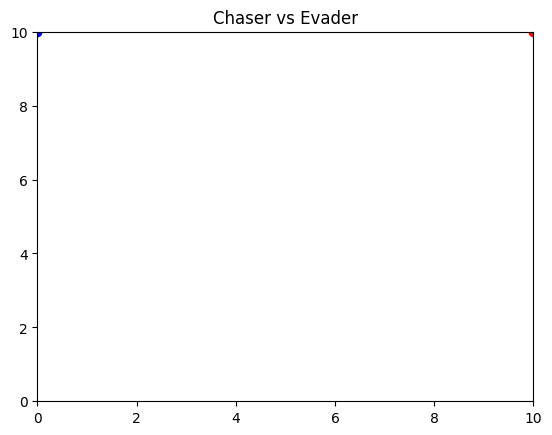

In [59]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 50

# Make sure there's something to animate
if len(chaser_path) > 0 and len(evader_path) > 0:
    fig, ax = plt.subplots()
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_title("Chaser vs Evader")
    chaser_dot, = ax.plot([], [], 'ro', label='Chaser')
    evader_dot, = ax.plot([], [], 'bo', label='Evader')
    #ax.legend()

    def init():
        chaser_dot.set_data([], [])
        evader_dot.set_data([], [])
        return chaser_dot, evader_dot

    def update(frame):
        cx, cy = chaser_path[frame]
        ex, ey = evader_path[frame]
        chaser_dot.set_data([float(cx)], [float(cy)])
        evader_dot.set_data([float(ex)], [float(ey)])
        return chaser_dot, evader_dot

    ani = animation.FuncAnimation(
        fig, update, frames=len(chaser_path),
        init_func=init, blit=True, interval=50, repeat=False
    )

    from IPython.display import HTML
    HTML(ani.to_jshtml())  # To display inside notebook
    ani.save("chase_evade_eval.gif", writer="pillow")
    print("✅ GIF saved as chase_evade_eval.gif")
else:
    print("❌ Not enough steps to animate!")


✅ Enhanced GIF saved as chase_evade_eval_trail.gif


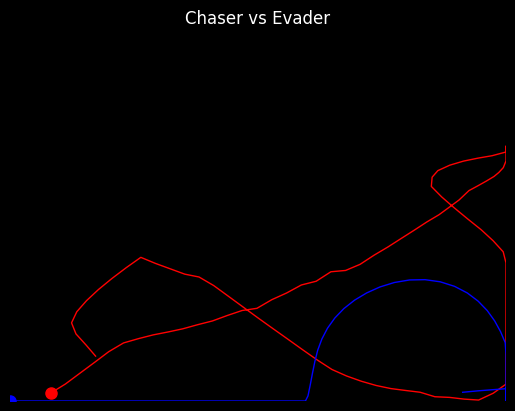

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 50

if len(chaser_path) > 0 and len(evader_path) > 0:
    fig, ax = plt.subplots()
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_title("Chaser vs Evader", color='white')
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    ax.axis('off')  # Hide axes

    # Main dots (chaser and evader)
    chaser_dot, = ax.plot([], [], 'ro', markersize=8)
    evader_dot, = ax.plot([], [], 'bo', markersize=8)

    # Trails (line plots)
    chaser_trail, = ax.plot([], [], 'r-', linewidth=1)
    evader_trail, = ax.plot([], [], 'b-', linewidth=1)

    def init():
        chaser_dot.set_data([], [])
        evader_dot.set_data([], [])
        chaser_trail.set_data([], [])
        evader_trail.set_data([], [])
        return chaser_dot, evader_dot, chaser_trail, evader_trail

    def update(frame):
        # Current positions
        cx, cy = chaser_path[frame]
        ex, ey = evader_path[frame]
        chaser_dot.set_data([float(cx)], [float(cy)])
        evader_dot.set_data([float(ex)], [float(ey)])

        # Trail paths up to current frame
        chaser_trail.set_data(
            [float(p[0]) for p in chaser_path[:frame + 1]],
            [float(p[1]) for p in chaser_path[:frame + 1]]
        )
        evader_trail.set_data(
            [float(p[0]) for p in evader_path[:frame + 1]],
            [float(p[1]) for p in evader_path[:frame + 1]]
        )
        return chaser_dot, evader_dot, chaser_trail, evader_trail

    ani = animation.FuncAnimation(
        fig, update, frames=len(chaser_path),
        init_func=init, blit=True, interval=50, repeat=False
    )

    # Save and optionally display in notebook
    from IPython.display import HTML
    HTML(ani.to_jshtml())
    ani.save("chase_evade_eval_trail.gif", writer="pillow")
    print("✅ Enhanced GIF saved as chase_evade_eval_trail.gif")

else:
    print("❌ Not enough steps to animate!")
